In [1]:
from dataretrieval import nwis
import pandas as pd
import matplotlib.pyplot as plt

setup code for defining a period, sites, and some thresholds for missing data.

In [2]:
startDate = "2020-10-01"   #   start date
endDate =  "2025-07-30"     #   end date

model_site = [
    "13340600"  # Site ID  
]

units_day = 365   # number of days in a year (ignores leap years)

# threshold for missing daily data (90% of 1 year = 328.5 days)
missing_data_threshold = 0.90 * 365  

# summer definition (June–August)
summer_months = [6, 7, 8]  

# threshold for missing summer data (90% of 92 days ≈ 82.8 days)
summer_missing_data_threshold = 0.90 * (30 + 31 + 31)


retrieves and processes hydrological data from the USGS National Water Information System (NWIS) using the nwis package

In [3]:
site_info = nwis.get_info(sites= model_site )
site_info_df = pd.DataFrame( site_info[0] )

site_info_df["site_no"]=site_info_df["site_no"].astype(str)
columns_to_save = ['site_no', 'station_nm','dec_lat_va', 'dec_long_va', 'drain_area_va', 'contrib_drain_area_va' ,   'alt_va']
filtered_df = site_info_df[columns_to_save]

parameterCode = ["00010","00060"  ]
dailyStreamtemp = nwis.get_dv(sites= model_site, parameterCd=parameterCode, start=startDate, end=endDate)

# Convert the retrieved data into a pandas DataFrame.
dailyStreamtemp_df = pd.DataFrame( dailyStreamtemp[0] )

# Convert the 'datetime' column to a proper datetime format for manipulation.
dailyStreamtemp_df = dailyStreamtemp_df.reset_index()

# Create separate columns for date, month, and year for easier filtering and analysis.
dailyStreamtemp_df['Date'] = dailyStreamtemp_df['datetime'].dt.date
dailyStreamtemp_df['Month'] = dailyStreamtemp_df['datetime'].dt.month
dailyStreamtemp_df['Year'] = dailyStreamtemp_df['datetime'].dt.year

print(dailyStreamtemp_df.head())

                   datetime   site_no  00010_Maximum 00010_Maximum_cd  \
0 2020-10-01 00:00:00+00:00  13340600           11.9                A   
1 2020-10-02 00:00:00+00:00  13340600           12.3                A   
2 2020-10-03 00:00:00+00:00  13340600           12.3                A   
3 2020-10-04 00:00:00+00:00  13340600           12.4                A   
4 2020-10-05 00:00:00+00:00  13340600           11.8                A   

   00010_Minimum 00010_Minimum_cd  00010_Mean 00010_Mean_cd  00060_Mean  \
0           11.1                A        11.5             A       699.0   
1           11.3                A        11.8             A       684.0   
2           11.7                A        12.0             A       674.0   
3           11.5                A        12.0             A       662.0   
4           11.0                A        11.6             A       651.0   

  00060_Mean_cd        Date  Month  Year  
0             A  2020-10-01     10  2020  
1             A  2020-10

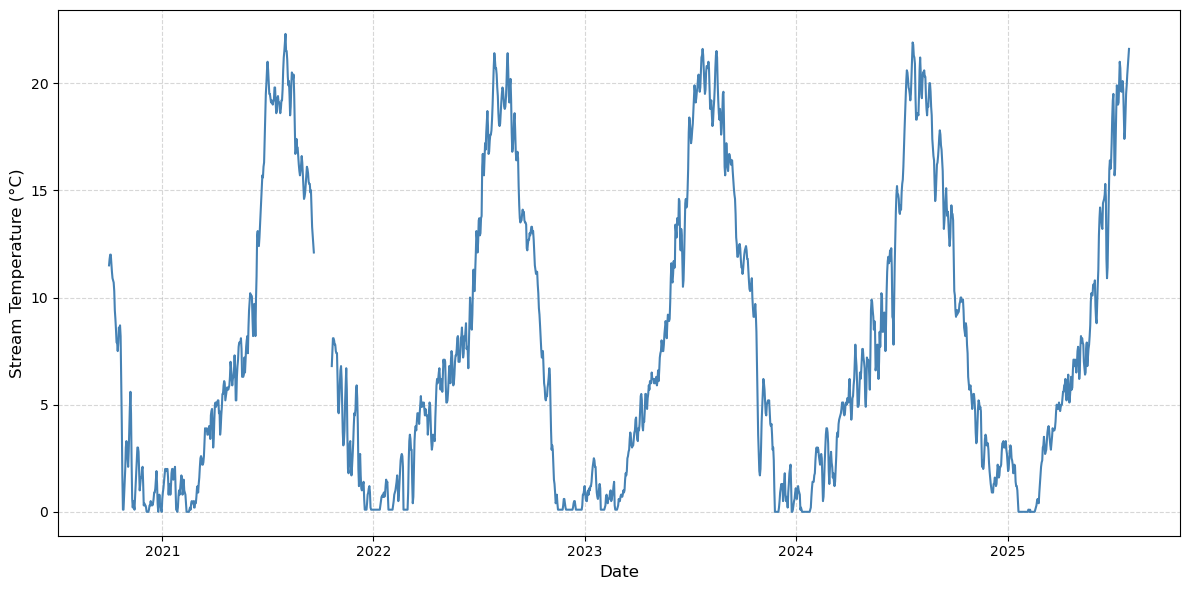

In [4]:
plt.figure(figsize=(12,6))
plt.plot(dailyStreamtemp_df["datetime"], dailyStreamtemp_df["00010_Mean"], 
         color="steelblue", linewidth=1.5)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Stream Temperature (°C)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
